In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib as matplt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn import (
    linear_model, metrics, pipeline, preprocessing, model_selection
)

from sklearn.preprocessing import scale, LabelEncoder
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, roc_auc_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

#!pip install lifelines
#from lifelines import CoxPHFitter

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

import sklearn.linear_model as skl_lm

from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.7/349.7 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 KB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=2c8de1cfc92b623e8a1190808006880f6d36c3b3f1b0f68ba4682ca02fb87be9
  Stored in directory: /root/.cache/pip/wheels/16/a2/b6/582cfdfbeeccd469504a01af3bb952fd9e7eccba40995eafea
Successfully built autograd-gamma


#Import data

In [85]:
raw_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/compas-scores-two-years.csv")
print(raw_data.shape)
raw_data.columns

(7214, 53)


Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [86]:
raw_data.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [ ]:
#raw_data.isna().sum()

Short comparison to other CSVs

In [87]:
parsed_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/cox-parsed.csv")
print(parsed_data.shape)
parsed_data.columns 

(13419, 52)


Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event'],
      dtype='object')

how is this dataset diffrent: number of rows is bigger (names double if diffrent), but columns are the same

In [88]:
parsed_data.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0
1,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,334,961,0
2,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1
3,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0
4,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,63,64,1


# Data Cleaning

In [89]:
df = raw_data.loc[
    (raw_data['days_b_screening_arrest'] <= 30) &
    (raw_data['days_b_screening_arrest'] >= -30) &
    (raw_data['is_recid'] != -1) &
    (raw_data['c_charge_degree'] != "O") &
    (raw_data['score_text'] != "N/A")
]
len(df)

6172

# Exploratory Analysis

In [90]:
df['race'].value_counts()

African-American    3175
Caucasian           2103
Hispanic             509
Other                343
Asian                 31
Native American       11
Name: race, dtype: int64

In [91]:
# Race by Score Text
pd.crosstab(df['score_text'],df['race'])

race,African-American,Asian,Caucasian,Hispanic,Native American,Other
score_text,,,,,,
High,845,3,223,47,4,22
Low,1346,24,1407,368,3,273
Medium,984,4,473,94,4,48


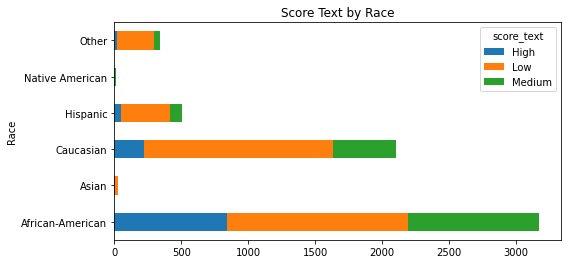

In [92]:
score_text_by_race = df.groupby(['race','score_text'], sort = True)['id'].size()
score_text_by_race.unstack().plot(
    kind = "barh", 
    title = "Score Text by Race",
    ylabel = "Score Text",
    xlabel = "Race",
    figsize = (8,4),
    stacked = True
)

In [93]:
df_three = df.loc[df['race'].isin(["African-American","Caucasian","Hispanic"])]

In [94]:
#calculate the total and proportions of score texts in each race group
score_text_by_race_prop= df_three.groupby(['race', 'score_text']).agg({'score_text': 'count'})
score_text_by_race_prop['prop'] = score_text_by_race_prop.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))
score_text_by_race_prop

score_text       prop
race             score_text                       
African-American High               845  26.614173
                 Low               1346  42.393701
                 Medium             984  30.992126
Caucasian        High               223  10.603899
                 Low               1407  66.904422
                 Medium             473  22.491679
Hispanic         High                47   9.233792
                 Low                368  72.298625
                 Medium              94  18.467583

In [95]:
df_three.groupby('race')['decile_score'].mean()

race
African-American    5.276850
Caucasian           3.635283
Hispanic            3.383104
Name: decile_score, dtype: float64

# Distribution of decile scores

Text(0, 0.5, 'Count')

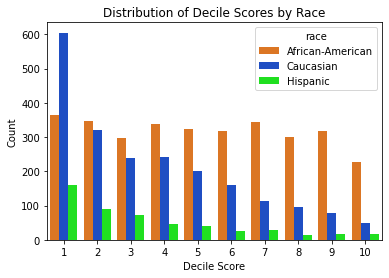

In [96]:
sns.countplot(
    data = df_three,
    x = 'decile_score',
    hue = 'race',
    palette = ["#F97306","#0343DF","#00FF00"]
)
plt.title('Distribution of Decile Scores by Race')
plt.xlabel('Decile Score')
plt.ylabel('Count')

# COMPAS Score Prediction
## Linear Regression Model

In [97]:
features = pd.concat(
    [pd.get_dummies(df_three.age_cat, prefix='age'),
     pd.get_dummies(df_three.sex, prefix='sex'),
     pd.get_dummies(df_three.c_charge_degree, prefix='degree'), # felony or misdemeanor charge ('f' or 'm')
     df.priors_count],
    axis=1)

# drop one less dummy variable
features.drop(['age_25 - 45', 'sex_Female', 'degree_M'], axis=1, inplace=True)

# predict the Decile Score
target = df_three.decile_score

In [98]:
target.head()

1     3
2     4
6     6
8     1
10    4
Name: decile_score, dtype: int64

In [99]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
    

## Lasso

In [100]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, target, test_size = 0.25, random_state = 3)

ValueError: ignored

In [101]:
alphas = 10**np.linspace(10,-2,1000)*0.5 #why?, why not make 0.95 in the first place?
#print(alphas)
#https://numpy.org/devdocs/reference/generated/numpy.linspace.html

In [102]:
# Lasso Model
# find the best alpha
lasso = linear_model.LassoCV(alphas = alphas, cv = 10, max_iter = 100000) #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
lasso_cv = lasso.fit(X_train,y_train)

lasso_predict = lasso_cv.predict(X_test)
lasso_mse = metrics.mean_squared_error(y_test, lasso_predict)
lasso_mse 

NameError: ignored

In [103]:
lasso_cv.alpha_

NameError: ignored

In [104]:
#accuracy of lasso
lasso_MAPE = MAPE(y_test,lasso_predict) #(Mean Absolute Percentage Error) 
print("MAPE value lasso Regression: ",lasso_MAPE)
lasso_Accuracy = 100 - lasso_MAPE
print('Accuracy of lasso Regression: {:0.2f}%.'.format(lasso_Accuracy))

NameError: ignored

In [105]:
#why both? do I see which variables are excluded by lasso in this case?
#Accuracy of Ridge is slightly better

## Ridge

In [106]:
#with alpha from lasso

#TO DO there is also a ridge cv function that should be used for alpha here
ridge = linear_model.Ridge(alpha = lasso_cv.alpha_, normalize = True) #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
ridge_model = ridge.fit(X_train, y_train) #that's with alpha=1.0

ridge_predict = ridge_model.predict(X_test)
ridge_mse = metrics.mean_squared_error(y_test, ridge_predict)
ridge_mse 

NameError: ignored

In [107]:
#ridge scheint nur mit einem alpha zu gehen und nicht mit alphas?

In [108]:
Ridge_MAPE = MAPE(y_test,ridge_predict)
print("MAPE value: ",Ridge_MAPE)
Accuracy = 100 - Ridge_MAPE
print('Accuracy of Ridge Regression: {:0.2f}%.'.format(Accuracy))

#source: https://www.askpython.com/python/examples/ridge-regression
#also interesting source: https://www.statology.org/ridge-regression-in-python/

NameError: ignored

In [109]:
'''clf = DecisionTreeClassifier(random_state=42)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, X_test, y_test, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

#source: https://www.w3schools.com/python/python_ml_cross_validation.asp'''

'clf = DecisionTreeClassifier(random_state=42)\n\nk_folds = KFold(n_splits = 5)\n\nscores = cross_val_score(clf, X_test, y_test, cv = k_folds)\n\nprint("Cross Validation Scores: ", scores)\nprint("Average CV Score: ", scores.mean())\nprint("Number of CV Scores used in Average: ", len(scores))\n\n#source: https://www.w3schools.com/python/python_ml_cross_validation.asp'

## Interpretation of MSE

Advantages of using MSE
*  Easy to calculate in Python
*  Simple to understand calculation for end users
*  Designed to punish large errors

Disadvantages of using MSE
*  Error value not given in terms of the target
*  Difficult to interpret
*  Not comparable across use cases

What is a good MSE value?
The closer your MSE value is to 0, the more accurate your model is. However, there is no 'good' value for MSE. It is an absolute value which is unique to each dataset and can only be used to say whether the model has become more or less accurate than a previous run.

Can MSE be used to compare models?
MSE cannot be used to compare different models from different datasets as it’s an absolute value that is only relevant to that given dataset. If you need to compare models across different datasets then it would be best to use percentage metrics such as MAPE.

source: https://stephenallwright.com/good-mse-value/

## Interpretation of MAPE

MAPE (Mean Absolute Percentage Error) is a common regression machine learning metric, but it can be confusing to know what a good score actually is. In this post, I explain what MAPE is, what a good score is, and answer some common questions that people have.

What is MAPE?
Mean Absolute Percentage Error (MAPE) is the mean of all absolute percentage errors between the predicted and actual values.

It is a popular metric to use as it returns the error as a percentage, making it both easy for end users to understand and simple to compare model accuracy across use cases and datasets.

Positives of using MAPE as a metric
*  Easy for end users to understand as the error is a percentage
*  Possible to compare model accuracy across datasets and use cases
*  Easily implemented in Python

Negatives of using MAPE as a metric
*  Not possible to use when actual values can be at or close to zero

When to use MAPE?
MAPE should be used when either communicating results to end users is important or when you need to be able to compare your results with other models. It shouldn’t be used when you have actual values that are close to or at zero due to the division by zero error.

source: https://stephenallwright.com/good-mape-score/

# Reproduce COMPAS analysis

*   Distribution of COMPAS score among whtites and blacks (plot) & compare with Distribution of real recidivism among whites and blacks (plot)
*   Most predictive factors in logistic model (with controlling for other factors) for score

Application of Survival Function (It looks at Time to event (in this case 2 years):

*   Cox proportional hazard model (https://towardsdatascience.com/the-cox-proportional-hazards-model-35e60e554d8f) 
·	Coefficients
·	Interaction term
·	Contigency table (FP / FN rates) among all, whites and blacks

*   Kaplan Meier survival plot „shows the probability of an event at a respective time interval“ (https://www.mygreatlearning.com/blog/kaplan-meier-curve-explained/)



In [110]:
df_binary = df.loc[df['race'].isin(["African-American","Caucasian"])]

In [111]:
df_binary.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
6,8,edward riddle,edward,riddle,2014-02-19,Male,1974-07-23,41,25 - 45,Caucasian,...,2,Low,2014-02-19,2014-03-31,2014-04-18,14,5,40,1,1
8,10,elizabeth thieme,elizabeth,thieme,2014-03-16,Female,1976-06-03,39,25 - 45,Caucasian,...,1,Low,2014-03-16,2014-03-15,2014-03-18,0,2,747,0,0
10,14,benjamin franc,benjamin,franc,2013-11-26,Male,1988-06-01,27,25 - 45,Caucasian,...,4,Low,2013-11-26,2013-11-25,2013-11-26,0,0,857,0,0


### Distribution of COMPAS score among whtites and blacks (plot) & compare with Distribution of real recidivism among whites and blacks (plot)

In [112]:
#calculate the total and proportions of decile scores in each race group
decile_score_by_race_prop= df_binary.groupby(['race', 'decile_score']).agg({'decile_score': 'count'})
decile_score_by_race_prop['prop'] = decile_score_by_race_prop.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))

In [113]:
is_recid_by_race_prop= df_binary.groupby(['race', 'is_recid']).agg({'decile_score': 'count'})
is_recid_by_race_prop['prop'] = is_recid_by_race_prop.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))

Text(0, 0.5, 'Count')

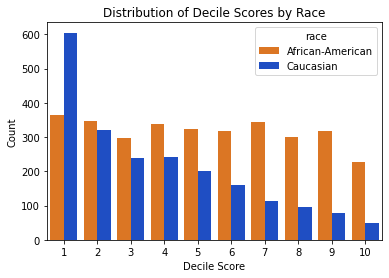

In [114]:
sns.countplot(
    data = df_binary,
    x = 'decile_score',
    hue = 'race',
    palette = ["#F97306","#0343DF","#00FF00"]
)
plt.title('Distribution of Decile Scores by Race')
plt.xlabel('Decile Score')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

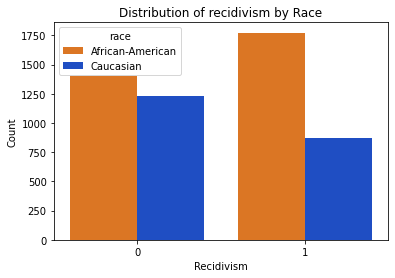

In [115]:
sns.countplot(
    data = df_binary,
    x = 'is_recid',
    hue = 'race',
    palette = ["#F97306","#0343DF","#00FF00"]
)
plt.title('Distribution of recidivism by Race')
plt.xlabel('Recidivism')
plt.ylabel('Count')

### Most predictive factors in logistic model (with controlling for other factors) for score

In [116]:
#medium and high are high, low stays low

df['score_text_binary'] = df['score_text'].replace(['Medium'], 'High')

In [117]:
#make numbers
df['score_text_binary']= df['score_text_binary'].replace(['High'], 1)
df['score_text_binary']= df['score_text_binary'].replace(['Low'], 0)

ProPublica Claim: Black defendants are 45% more likely than white defendants to receive a higher score correcting for the seriousness of their crime, previous arrests, and future criminal behavior (when adjusted for other variables, because in their table they show 0.47).

In [119]:
# logistic regression
est = smf.logit('score_text_binary ~ C(age_cat) + C(race, Treatment(reference="Caucasian")) + C(sex,Treatment(reference="Male")) + priors_count + C(c_charge_degree) + two_year_recid', df).fit()
print(est.summary())

Optimization terminated successfully.
         Current function value: 0.499708
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:      score_text_binary   No. Observations:                 6172
Model:                          Logit   Df Residuals:                     6160
Method:                           MLE   Df Model:                           11
Date:                Wed, 18 Jan 2023   Pseudo R-squ.:                  0.2729
Time:                        17:57:29   Log-Likelihood:                -3084.2
converged:                       True   LL-Null:                       -4241.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
Interc

In [120]:
#Controlling for other variables 
ControlgGroup= np.exp(-1.5255)/(1+ np.exp(-1.5255))
FinalClaim= np.exp(0.4772)/(1- ControlgGroup + (ControlgGroup * np.exp(0.4772)))
FinalClaim
#Black people are 45% more likely to be assesed as high risk

1.452825407001621

Cox analysis : in progress


In [121]:
# Cleaning as ProPublica article
parsed_filter= parsed_data.loc[
    (parsed_data['score_text'] != 'N/A') &
    (parsed_data['end'] > parsed_data['start'])]


parsed_not_duplicates= parsed_filter.drop_duplicates(subset='id')

# drop variables not dummyfiables
parsed_not_duplicates= parsed_not_duplicates.drop(['name','first','last','compas_screening_date'], axis=1)

print(parsed_not_duplicates.shape) #They have 10314 and we have 10325 (?)
parsed_not_duplicates.columns

(10325, 48)


Index(['id', 'sex', 'dob', 'age', 'age_cat', 'race', 'juv_fel_count',
       'decile_score', 'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event'],
      dtype='object')

In [123]:
#Dummy variables 
for feature in parsed_not_duplicates.columns:
    if parsed_not_duplicates[feature].dtype=="object":
      le = LabelEncoder()
      le.fit(parsed_not_duplicates.columns)
      parsed_not_duplicates[feature] = le.fit_transform(parsed_not_duplicates[feature].astype(str)) #le.fit_transform(df_train[feature].astype(str))

print(parsed_not_duplicates.head())

   id  sex   dob  age  age_cat  race  juv_fel_count  decile_score  \
0   1    1    77   69        1     5              0             1   
2   3    1  3660   34        0     0              0             3   
3   4    1  5886   24        2     0              0             4   
5   5    1  6326   23        2     0              0             8   
6   6    1  2203   43        0     5              0             1   

   juv_misd_count  juv_other_count  ...  v_type_of_assessment  v_decile_score  \
0               0                0  ...                     0               1   
2               0                0  ...                     0               1   
3               0                1  ...                     0               3   
5               1                0  ...                     0               6   
6               0                0  ...                     0               1   

   v_score_text  v_screening_date  in_custody  out_custody  priors_count.1  \
0             1     

In [124]:
#parsed_not_duplicates.isna().sum()

In [ ]:
cph = CoxPHFitter()
cph= cph.fit(parsed_not_duplicates, duration_col = 'end', event_col = 'event')
cph.print_summary()

TypeError: ignored

# Reproduce Northpointe's rebuttal
AUC Results in Sample A
Sample A consists of pretrial defendants with complete case
records who have at least two years of follow-up time. The PP authors use
Sample A to fit reverse logistic regressions predicting the“Not Low”Risk Level.
Subsets of Sample A are used for tests of the GRRS (n=6,172) and the VRRS
(n=4,020). (p.4 and 16 Northpointe)

In [133]:
# Convert categorical features to numeric levels
for feature in df.columns:
    if df[feature].dtype=="object":
      #print(feature)
      le = LabelEncoder()
      le.fit(df.columns)
      df[feature] = le.fit_transform(df[feature].astype(str)) #le.fit_transform(df_train[feature].astype(str))

print(df.head())

   id  name  first  last  compas_screening_date  sex   dob  age  age_cat  \
0   1  4216   1615  1454                    202    1    43   69        1   
1   3  3437   1285   897                     26    1  2280   34        0   
2   4  1709    651  2509                    102    1  3905   24        2   
5   7  3939   1545  2189                    307    1  1196   44        0   
6   8  1749    661  2707                    388    1  1447   41        0   

   race  ...  v_score_text  v_screening_date  in_custody  out_custody  \
0     5  ...             1               202         549          553   
1     0  ...             1                26          27           34   
2     0  ...             1               102         165          165   
5     5  ...             1               307         331          332   
6     2  ...             1               388         452          470   

   priors_count.1  start  end  event  two_year_recid  score_text_binary  
0               0      0  327 

In [134]:
y = df.score_text_binary

In [135]:
#we take the same features as ProPublica did for their logistic regression. This is what Northpointe did as well (Sample A)
X= df[['age_cat','race', 'sex', 'priors_count','c_charge_degree', 'two_year_recid']]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 3)

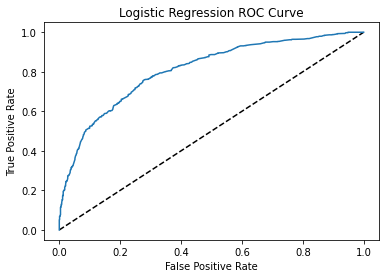

The total AUC is  0.8086094576777917


In [136]:
clf2 = skl_lm.LogisticRegression(solver='newton-cg')
clf2.fit(X_train,y_train)

y_pred = clf2.predict_proba(X_test) 
y_pred_prob = y_pred[:,1]


#ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

#AUC
print('The total AUC is ', roc_auc_score(y_test, y_pred_prob))

#Their AUC for sample A is 0.71

# Reproduce Washington Post 1 analysis

###Code taken from https://allendowney.github.io/RecidivismCaseStudy/02_calibration.html
###Is it ok that we take it? (Sofi)

In [137]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)


In [138]:
download('https://raw.githubusercontent.com/AllenDowney/RecidivismCaseStudy/' +
         'master/utils.py')

Downloaded utils.py


In [139]:
from utils import decorate
from utils import make_matrix
from utils import compute_metrics
from utils import error_rates

In [140]:
def calibration_curve(df):
    """Fraction in each risk group charged with another crime.
    
    df: DataFrame
    
    returns: Series
    """
    grouped = df.groupby('decile_score')
    return grouped['two_year_recid'].mean()

###The plot below shows an approximate equality between white and black defendants. This holds for every one of Northpointe’s 10 risk levels.

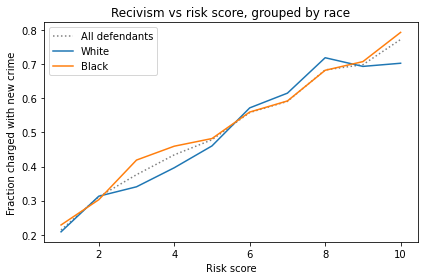

In [147]:
cal_all = calibration_curve(raw_data)
cal_all.plot(linestyle='dotted', 
              color='gray',
              label='All defendants')

white = (raw_data['race'] == 'Caucasian')
cal_white = calibration_curve(raw_data[white])
cal_white.plot(label='White')

black = (raw_data['race'] == 'African-American')
cal_black = calibration_curve(raw_data[black])
cal_black.plot(label='Black')

decorate(xlabel='Risk score',
         ylabel='Fraction charged with new crime',
         title='Recivism vs risk score, grouped by race')

###This plot shows that we can’t be fair in both ways at the same time

In [141]:
import plotly.express as px

In [142]:
df_black = raw_data.loc[raw_data['race'].isin(["African-American"])]
df_black.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
11,15,ellyaher lanza,ellyaher,lanza,2013-10-03,Male,1992-08-18,23,Less than 25,African-American,...,4,Low,2013-10-03,2013-10-03,2013-10-07,3,4,128,1,1
13,18,jarrod turbe,jarrod,turbe,2013-10-09,Male,1974-12-02,41,25 - 45,African-American,...,2,Low,2013-10-09,2013-10-08,2013-10-09,0,0,905,0,0


In [143]:
df_white = raw_data.loc[raw_data['race'].isin(["Caucasian"])]
df_white.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
6,8,edward riddle,edward,riddle,2014-02-19,Male,1974-07-23,41,25 - 45,Caucasian,...,2,Low,2014-02-19,2014-03-31,2014-04-18,14,5,40,1,1
8,10,elizabeth thieme,elizabeth,thieme,2014-03-16,Female,1976-06-03,39,25 - 45,Caucasian,...,1,Low,2014-03-16,2014-03-15,2014-03-18,0,2,747,0,0
9,13,bo bradac,bo,bradac,2013-11-04,Male,1994-06-10,21,Less than 25,Caucasian,...,5,Medium,2013-11-04,2015-01-06,2015-01-07,1,0,428,1,1
10,14,benjamin franc,benjamin,franc,2013-11-26,Male,1988-06-01,27,25 - 45,Caucasian,...,4,Low,2013-11-26,2013-11-25,2013-11-26,0,0,857,0,0
12,16,kortney coleman,kortney,coleman,2013-01-01,Female,1978-08-22,37,25 - 45,Caucasian,...,1,Low,2013-01-01,2013-01-01,2013-01-02,0,1,1186,0,0


In [178]:
df_white['score_text'] = raw_data['score_text'].replace(['Medium'], 'Medium/High').replace(['High'], 'Medium/High')
df_white_recid = df_white.loc[df_white['is_recid'].isin([1])]
df_white_nonrecid = df_white.loc[df_white['is_recid'].isin([0])]
df_black['score_text'] = raw_data['score_text'].replace(['Medium'], 'Medium/High').replace(['High'], 'Medium/High')
df_black_recid = df_black.loc[df_black['is_recid'].isin([1])]
df_black_nonrecid = df_black.loc[df_black['is_recid'].isin([0])]


<function matplotlib.pyplot.show(*args, **kw)>

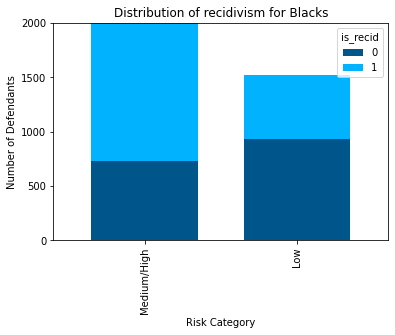

In [179]:
## trying with 2 subplots for stacking
df_plot = df_black.groupby(['is_recid', 'score_text']).size().reset_index().pivot(columns='is_recid', index='score_text', values=0)
ax = df_plot.plot(
    kind='bar', 
    stacked=True,
    width=0.7,
    title='Distribution of recidivism for Blacks',
    color=["#00558A","#00B2FF"])
plt.gca().invert_xaxis()
ax.set_xlabel("Risk Category")
ax.set_ylabel("Number of Defendants")
plt.ylim([0, 2000])
plt.yticks([0, 500, 1000, 1500, 2000])

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

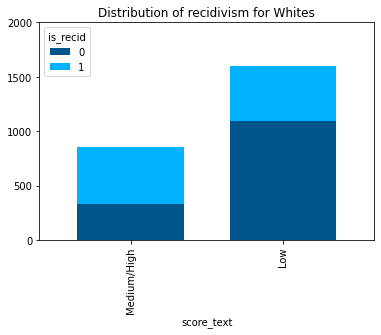

In [180]:
df_plot = df_white.groupby(['is_recid', 'score_text']).size().reset_index().pivot(columns='is_recid', index='score_text', values=0)
df_plot.plot(
    kind='bar', 
    stacked=True,
    width=0.7,
    title='Distribution of recidivism for Whites',
    color=["#00558A","#00B2FF"])
plt.gca().invert_xaxis()
ax.set_xlabel("Risk Category")
ax.set_ylabel("Number of Defendants")
plt.ylim([0, 2000])
plt.yticks([0, 500, 1000, 1500, 2000])

plt.show

# Directly / indirectly Model recidivism / Tree based model for ?


directly(classification) --> random forest?
*  predict recidivism
*  predict violent recidivism

indirectly (regression)
*  predict COMPAS scores for recidivism
*  predict COMPAS scores for violent recidivism


# Explore connections between local and global explanations from machine learning model with multiple linear regression

# 1 or more questions from the following:

1. Is there a single correct definition of fairness ? Are multiple types of fairness compatible ?
2. Are interpretable models just as accurate as black box machine learning models for predicting recidivism ?
Can complex models be as transparent as simple ones ? How do I communicate nonlinear dependencies ?
3. How do I explain a single prediction, i.e. how do I decompose it into feature driven components ? What
would be useful global feature attribution methods ?
4. How does the "base rate" affect the tradeoffs ?
5. How can I find relevant interactions ?
6. Counterfactuals: what extra value do they bring and what assumptions are made ?


# Are the COMPAS risk scales racially biased against blacks?


"Particular characteristics of non-black defendants in Broward County, Florida are the reason why some of the previous analyses found COMPAS biased" (stated as an assumption in file:///C:/Users/joana/Documents/Nextcloud/03%20Karriere/2022%20WS%2023%20BIPM%20HWR/1%20-%20Data%20Science/project/reading/Chapter%2010%20Story%20COMPAS_%20recidivism%20reloaded%20_%20XAI%20Stories.pdf page 16)

Check Ceteris Paribus (which freezes all othe factors) and then it's still biased for African Americans (same, page 20)



could they controll for race (interrelating with age and number for arrests for example)?

### Is the Articel / model of COMPAS good?

They should have done a regression with only whites and blacks not all --> numbers change

# Check in the end whether:
